In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

military_terms_expanded = list(set([
    "army", "military", "soldier", "commander", "officer", "garrison",
    "troop", "battalion", "brigade", "platoon", "infantry", "navy", "air force",
    "rocket forces", "people's army", "military personnel", "armed forces",
    "weapon", "arms", "missile", "nuclear", "warhead", "bomb", "explosive",
    "artillery", "firepower", "munition", "rocket", "ballistic", "torpedo",
    "military technology", "advanced weapons", "strategic weapon", "chemical weapons",
    "biological weapons", "cyber-warfare", "satellite weapons", "surveillance",
    "war", "battle", "combat", "conflict", "operation", "assault", "strike",
    "occupation", "siege", "mobilization", "preemptive strike", "intervention",
    "maneuver", "tactics", "deterrence", "doctrine", "offensive", "defensive",
    "juche", "songun", "revolution", "socialist revolution", "leadership of the party",
    "hero", "martyr", "supreme commander", "supreme leader", "dear leader",
    "eternal president", "national defense", "socialist defense", "anti-imperialism",
    "enemy", "hostile forces", "imperialist", "capitalist enemy", "anti-u.s.",
    "anti-western", "nuclear deterrent", "revolutionary cause", "military-first policy",
    "defense industry", "military production", "military base", "supply line",
    "rear services", "strategic reserve", "conscription", "training",
    "military spending", "budget", "military readiness", "drill", "command economy"
]))


military_terms_clean = set(re.sub(r'\s+', '', term.lower()) for term in military_terms_expanded)
def analyze_lda_militarization(path_to_csv, output_path):
    df = pd.read_csv(path_to_csv)


    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df['Cleaned_Speech_Text'])


    lda = LatentDirichletAllocation(n_components=8, random_state=42)
    lda.fit(X)


    feature_names = vectorizer.get_feature_names_out()
    n_top_words = 10
    topic_scores = []
    for topic_idx, topic in enumerate(lda.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        cleaned_top_words = [re.sub(r'\s+', '', word.lower()) for word in top_words]
        military_overlap = sum(1 for word in cleaned_top_words if word in military_terms_clean)
        topic_scores.append((topic_idx, military_overlap, top_words))


    military_topic_index = max(topic_scores, key=lambda x: x[1])[0]
    print(f"\n Анализ файла: {path_to_csv}")
    print(f"Военная тема — №{military_topic_index + 1}\n")
    for t in topic_scores:
        print(f"Тема #{t[0] + 1}: {' '.join(t[2])} — совпадений с военным словарем: {t[1]}")


    topic_distributions = lda.transform(X)
    df['lda_militarization_score'] = topic_distributions[:, military_topic_index]


    df.to_csv(output_path, index=False)
    print(f"\n Сохранено: {output_path}\n")


analyze_lda_militarization("/content/cleaned_speeches_soft.csv", "/content/speeches_soft_with_lda_score.csv")
analyze_lda_militarization("/content/cleaned_speeches_spacy.csv", "/content/speeches_spicy_with_lda_score.csv")


 Анализ файла: /content/cleaned_speeches_soft.csv
Военная тема — №5

Тема #1: young youth league organization nation history historical heritage member site — совпадений с военным словарем: 0
Тема #2: party official build building army socialist project revolutionary material problem — совпадений с военным словарем: 1
Тема #3: party revolutionary revolution official work leader spirit worker socialism life — совпадений с военным словарем: 1
Тема #4: farming production province economy farm country party official relation area — совпадений с военным словарем: 0
Тема #5: party revolutionary army revolution socialist force nation victory songun struggle — совпадений с военным словарем: 3
Тема #6: chongryon nation compatriot japan reunification movement koreans patriotic south north — совпадений с военным словарем: 0
Тема #7: health public medical revolutionary site medicine party battle hospital area — совпадений с военным словарем: 1
Тема #8: tree forest patriotism plant mountain party 

100%|██████████| 13/13 [00:13<00:00,  1.08s/it]


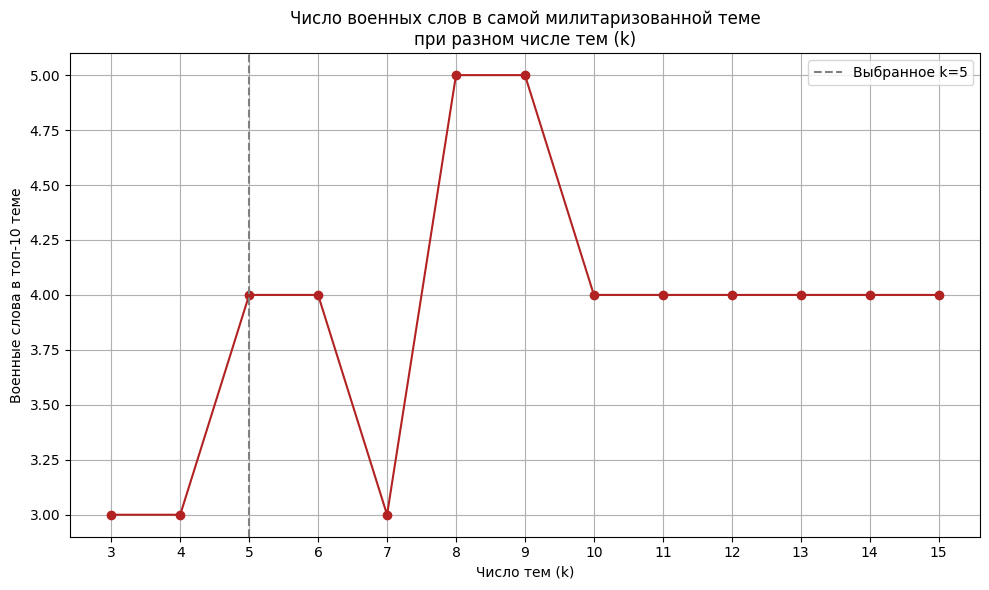

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from tqdm import tqdm

df = pd.read_csv("/content/cleaned_speeches_spacy.csv")

military_terms_expanded = list(set([
    "army", "military", "soldier", "commander", "officer", "garrison",
    "troop", "battalion", "brigade", "platoon", "infantry", "navy", "air force",
    "rocket forces", "people's army", "military personnel", "armed forces",
    "weapon", "arms", "missile", "nuclear", "warhead", "bomb", "explosive",
    "artillery", "firepower", "munition", "rocket", "ballistic", "torpedo",
    "military technology", "advanced weapons", "strategic weapon", "chemical weapons",
    "biological weapons", "cyber-warfare", "satellite weapons", "surveillance",
    "war", "battle", "combat", "conflict", "operation", "assault", "strike",
    "occupation", "siege", "mobilization", "preemptive strike", "intervention",
    "maneuver", "tactics", "deterrence", "doctrine", "offensive", "defensive",
    "juche", "songun", "revolution", "socialist revolution", "leadership of the party",
    "hero", "martyr", "supreme commander", "supreme leader", "dear leader",
    "eternal president", "national defense", "socialist defense", "anti-imperialism",
    "enemy", "hostile forces", "imperialist", "capitalist enemy", "anti-u.s.",
    "anti-western", "nuclear deterrent", "revolutionary cause", "military-first policy",
    "defense industry", "military production", "military base", "supply line",
    "rear services", "strategic reserve", "conscription", "training",
    "military spending", "budget", "military readiness", "drill", "command economy"
]))
military_terms_clean = set(re.sub(r'\s+', '', term.lower()) for term in military_terms_expanded)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Speech_Text'])
feature_names = vectorizer.get_feature_names_out()

results = []

for k in tqdm(range(3, 16)):
    lda = LatentDirichletAllocation(n_components=k, random_state=42)
    lda.fit(X)

    max_military_overlap = 0
    for topic in lda.components_:
        top_indices = topic.argsort()[:-11:-1]
        top_words = [feature_names[i] for i in top_indices]
        cleaned_words = [re.sub(r'\s+', '', word.lower()) for word in top_words]
        military_overlap = sum(1 for word in cleaned_words if word in military_terms_clean)
        max_military_overlap = max(max_military_overlap, military_overlap)

    results.append((k, max_military_overlap))

ks, overlaps = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(ks, overlaps, marker='o', color='firebrick')
plt.axvline(x=5, linestyle='--', color='gray', label='Выбранное k=5')
plt.title('Число военных слов в самой милитаризованной теме\nпри разном числе тем (k)')
plt.xlabel('Число тем (k)')
plt.ylabel('Военные слова в топ-10 теме')
plt.xticks(range(3, 16))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

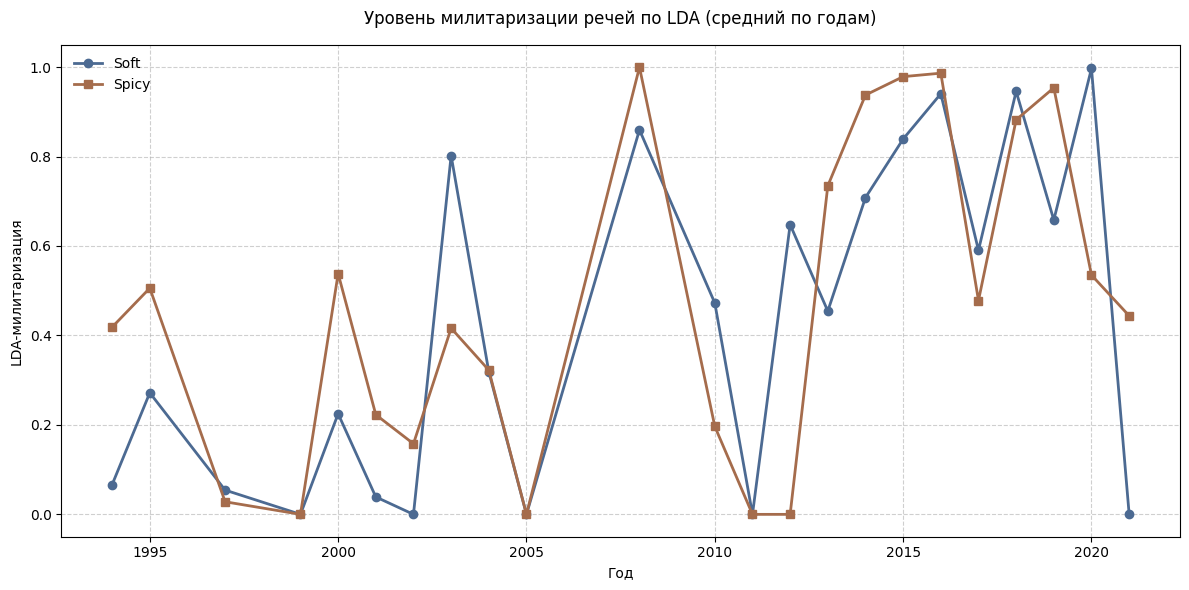

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка файлов (если CSV, например)
df_soft = pd.read_csv("/content/speeches_soft_with_lda_score.csv")
df_spicy = pd.read_csv("/content/speeches_spicy_with_lda_score.csv")

# Преобразование даты к году
df_soft['Date'] = pd.to_datetime(df_soft['Date'], errors='coerce')
df_soft['Year'] = df_soft['Date'].dt.year

df_spicy['Date'] = pd.to_datetime(df_spicy['Date'], errors='coerce')
df_spicy['Year'] = df_spicy['Date'].dt.year

# Среднее значение LDA по годам
soft_avg = df_soft.groupby('Year')['lda_militarization_score'].mean()
spicy_avg = df_spicy.groupby('Year')['lda_militarization_score'].mean()

# График
plt.figure(figsize=(12, 6))

plt.plot(
    soft_avg.index, soft_avg.values,
    label="Soft", marker='o', linestyle='-', linewidth=2,
    color='#4c6a92'
)
plt.plot(
    spicy_avg.index, spicy_avg.values,
    label="Spicy", marker='s', linestyle='-', linewidth=2,
    color='#a56c4c'
)

plt.title("Уровень милитаризации речей по LDA (средний по годам)", pad=15)
plt.xlabel("Год")
plt.ylabel("LDA-милитаризация")

plt.legend(frameon=False, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()